In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:
df=pd.read_csv(r'C:\Users\asifk\Desktop\credit card data\creditcard.csv')

In [3]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
df.shape

(284807, 31)

0    284315
1       492
Name: Class, dtype: int64


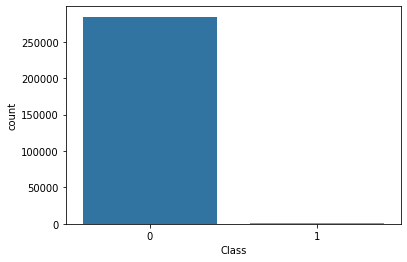

In [41]:
sns.countplot(df.Class)
print(df.Class.value_counts())

In [6]:
X=df.drop('Class',axis=1)
y=df.Class

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

## Logistic_Regression

In [9]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)


In [10]:
clf=GridSearchCV(log_class,grid,cv=cv,scoring='f1_macro',n_jobs=-1,)
clf.fit(X_train,y_train)

C:\Users\asifk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [11]:
y_pred=clf.predict(X_test)

In [12]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85254    56]
 [   43    90]]
0.9988413328183702
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85310
           1       0.62      0.68      0.65       133

    accuracy                           1.00     85443
   macro avg       0.81      0.84      0.82     85443
weighted avg       1.00      1.00      1.00     85443



### RandomForestClassifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
tree_class=RandomForestClassifier(n_jobs=-1,)
tree_class.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [14]:
y_pred=tree_class.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85296    14]
 [   28   105]]
0.9995084442259752
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85310
           1       0.88      0.79      0.83       133

    accuracy                           1.00     85443
   macro avg       0.94      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



### under sampling


In [18]:

from collections import Counter
Counter(y_train)

Counter({0: 199005, 1: 359})

In [21]:
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.8)
X_train_ns,y_train_ns=ns.fit_sample(X_train,y_train)

C:\Users\asifk\anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [22]:
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 199005, 1: 359})
The number of classes after fit Counter({0: 448, 1: 359})


In [23]:
clf=GridSearchCV(log_class,grid,cv=cv,scoring='f1_macro',n_jobs=-1,)
clf.fit(X_train_ns,y_train_ns)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [24]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[71717 13593]
 [   13   120]]
0.8407593366337792
              precision    recall  f1-score   support

           0       1.00      0.84      0.91     85310
           1       0.01      0.90      0.02       133

    accuracy                           0.84     85443
   macro avg       0.50      0.87      0.47     85443
weighted avg       1.00      0.84      0.91     85443



In [25]:
tree_class=RandomForestClassifier(n_jobs=-1,)
tree_class.fit(X_train_ns,y_train_ns)

RandomForestClassifier(n_jobs=-1)

In [26]:
y_pred=tree_class.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[66265 19045]
 [    7   126]]
0.7770209379352316
              precision    recall  f1-score   support

           0       1.00      0.78      0.87     85310
           1       0.01      0.95      0.01       133

    accuracy                           0.78     85443
   macro avg       0.50      0.86      0.44     85443
weighted avg       1.00      0.78      0.87     85443



### Over sample

In [28]:
from imblearn.over_sampling import RandomOverSampler

In [34]:
os=RandomOverSampler(0.75)
X_train_os,y_train_os=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

C:\Users\asifk\anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


The number of classes before fit Counter({0: 199005, 1: 359})
The number of classes after fit Counter({0: 199005, 1: 149253})


In [30]:
clf=GridSearchCV(log_class,grid,cv=cv,scoring='f1_macro',n_jobs=-1,)
clf.fit(X_train_os,y_train_os)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [31]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))    

[[83573  1737]
 [   12   121]]
0.9795302131245391
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85310
           1       0.07      0.91      0.12       133

    accuracy                           0.98     85443
   macro avg       0.53      0.94      0.56     85443
weighted avg       1.00      0.98      0.99     85443



In [39]:
tree_class=RandomForestClassifier(n_jobs=8)
tree_class.fit(X_train_os,y_train_os)

RandomForestClassifier(n_jobs=8)

In [40]:
y_pred=tree_class.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85297    13]
 [   29   104]]
0.9995084442259752
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85310
           1       0.89      0.78      0.83       133

    accuracy                           1.00     85443
   macro avg       0.94      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



SMOTETomek

### SMOTETomek

In [42]:
from imblearn.combine import SMOTETomek

In [43]:
sm=SMOTETomek(0.5)

X_train_sm,y_train_sm=sm.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_sm)))


C:\Users\asifk\anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


The number of classes before fit Counter({0: 199005, 1: 359})
The number of classes after fit Counter({0: 198139, 1: 98636})


In [44]:
tree_class=RandomForestClassifier(n_jobs=4)
tree_class.fit(X_train_sm,y_train_sm)

RandomForestClassifier(n_jobs=4)

In [45]:
y_pred=tree_class.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85289    21]
 [   22   111]]
0.9994967405170698
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85310
           1       0.84      0.83      0.84       133

    accuracy                           1.00     85443
   macro avg       0.92      0.92      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [47]:
from imblearn.ensemble import EasyEnsembleClassifier
easy=EasyEnsembleClassifier()

In [48]:
easy.fit(X_train,y_train)

EasyEnsembleClassifier()

In [49]:

y_pred=easy.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[82350  2960]
 [   10   123]]
0.9652399845511043
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85310
           1       0.04      0.92      0.08       133

    accuracy                           0.97     85443
   macro avg       0.52      0.95      0.53     85443
weighted avg       1.00      0.97      0.98     85443

